In [57]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [23]:
df=pd.read_csv("Housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [25]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [26]:
df.describe(include='object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [27]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [28]:
df.duplicated().sum()

0

# Univariate Analysis 


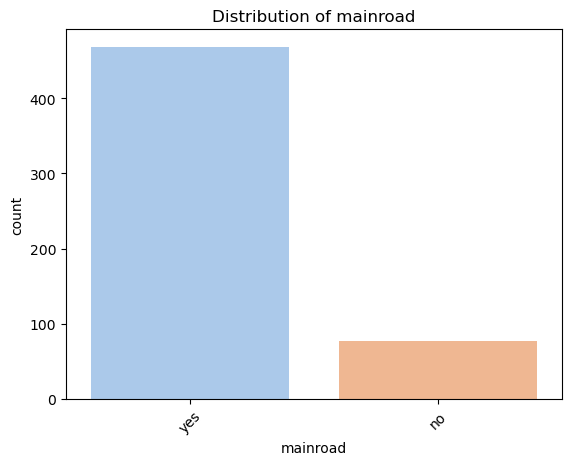

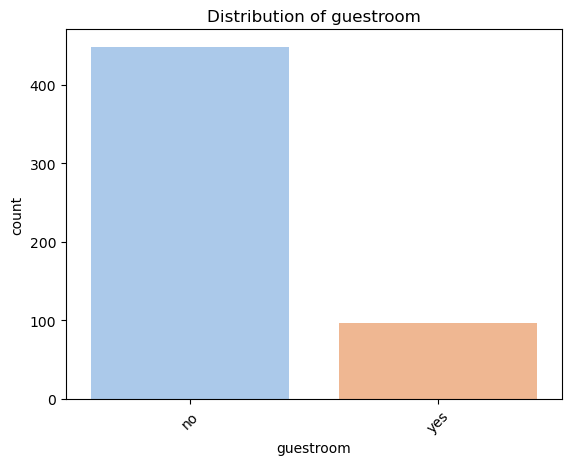

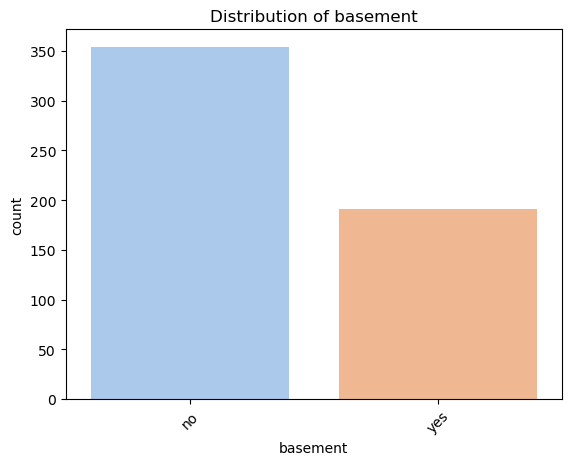

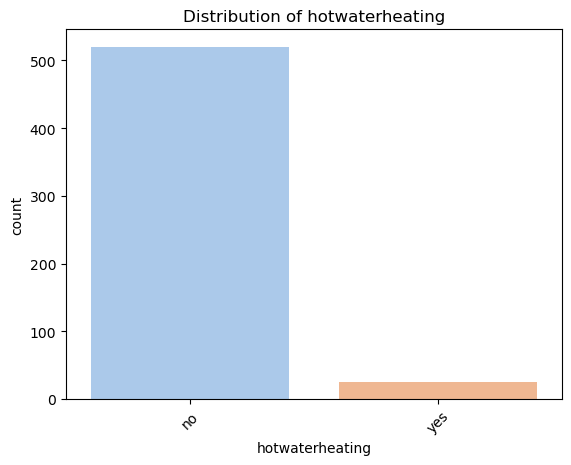

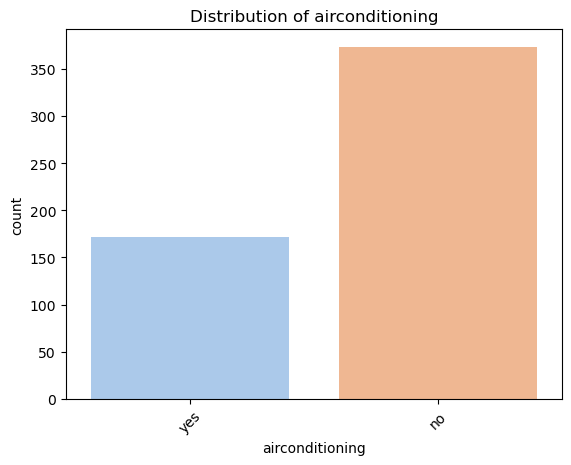

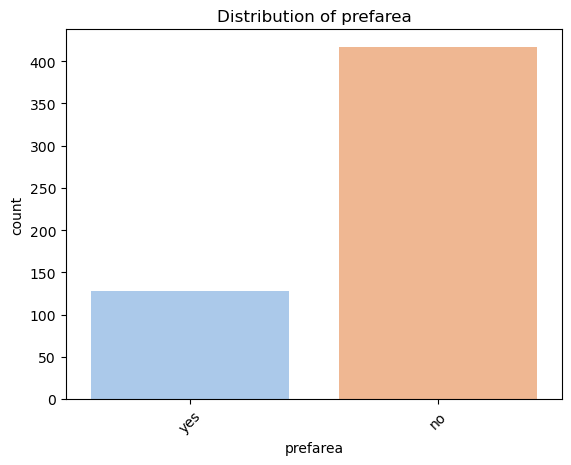

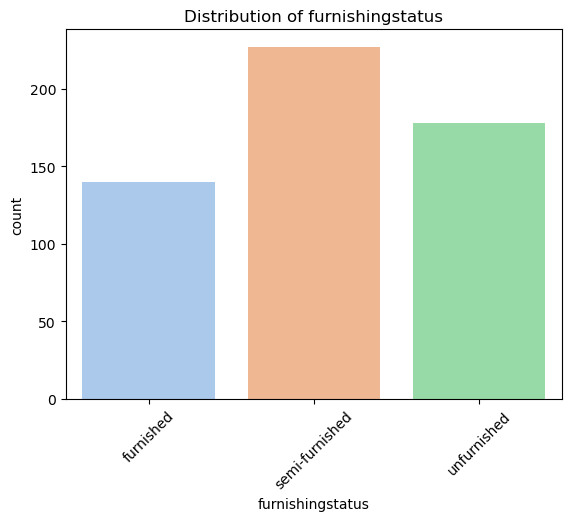

In [33]:
categorical = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in categorical:
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

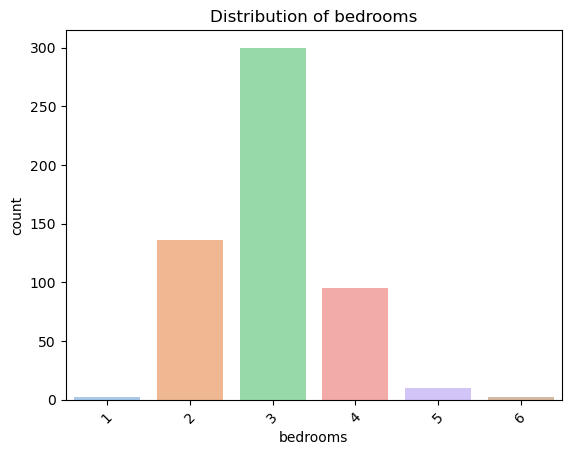

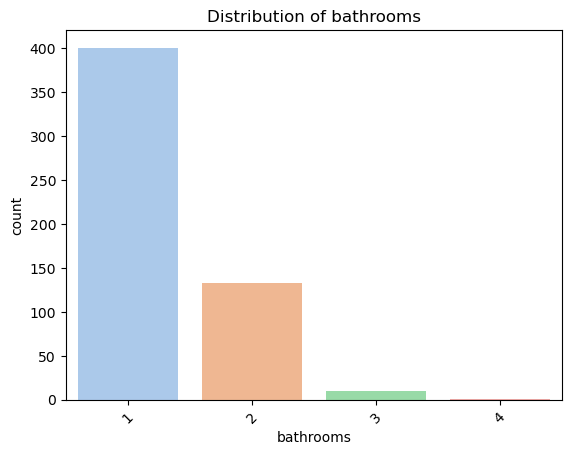

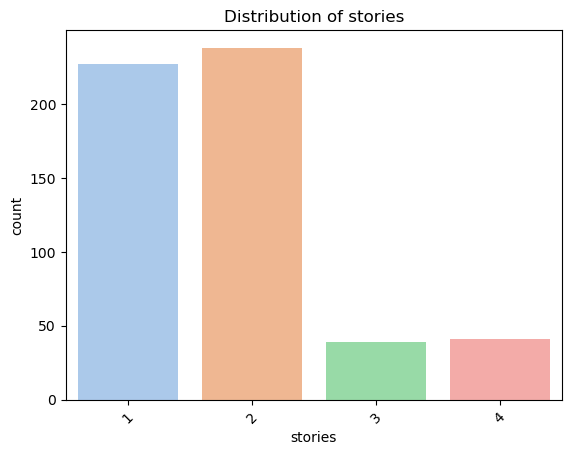

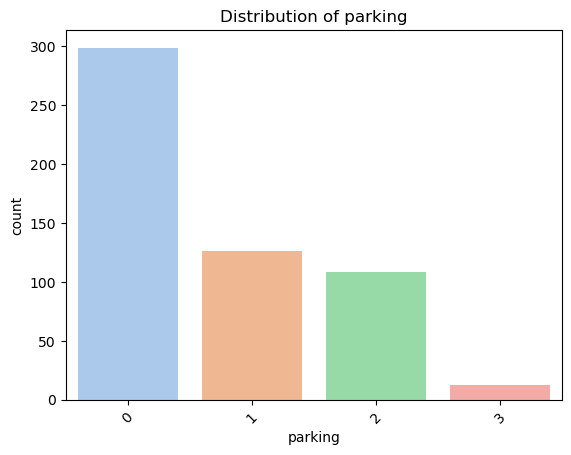

In [34]:
numerical = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for col in numerical:
    if col != 'area':
      sns.countplot(x=col, data=df, palette='pastel')
      plt.title(f'Distribution of {col}')
      plt.xticks(rotation=45)
      plt.show()

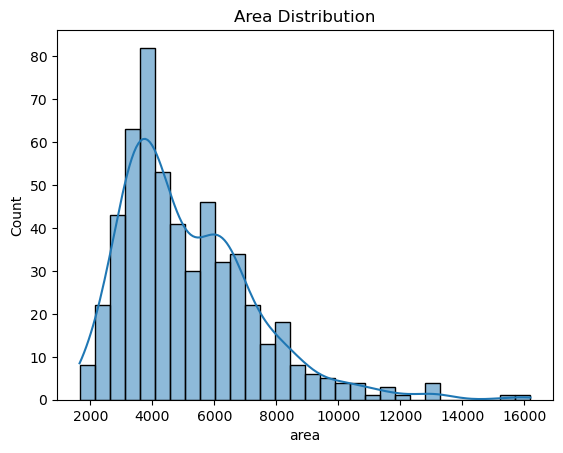

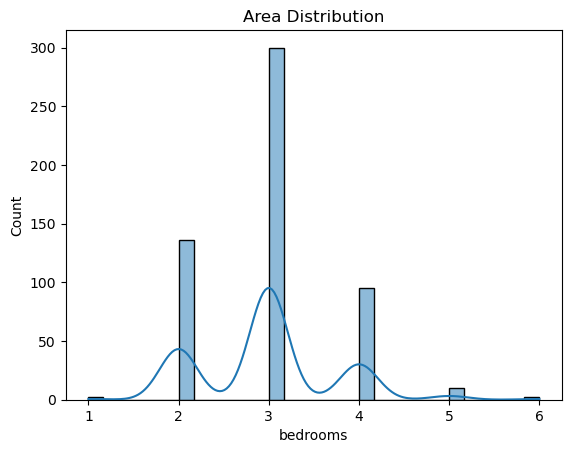

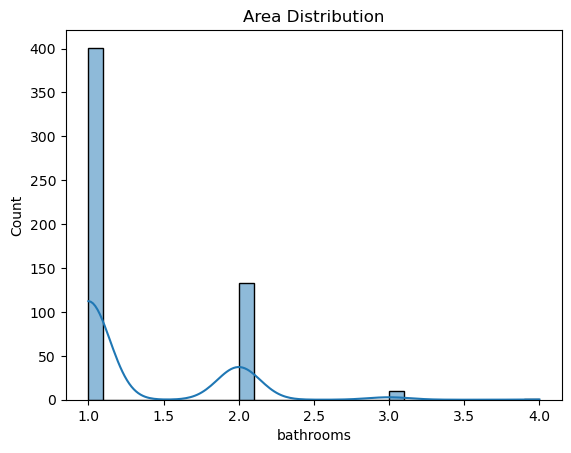

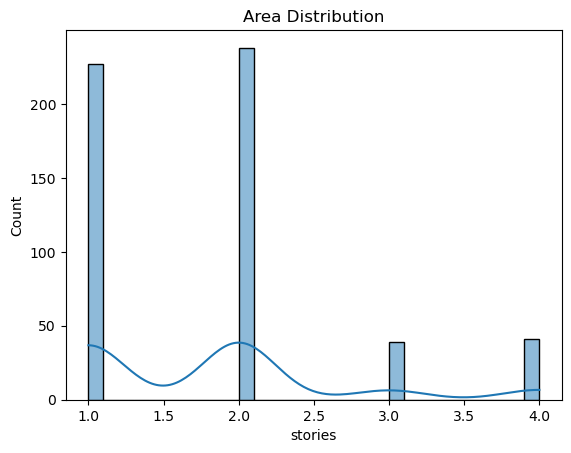

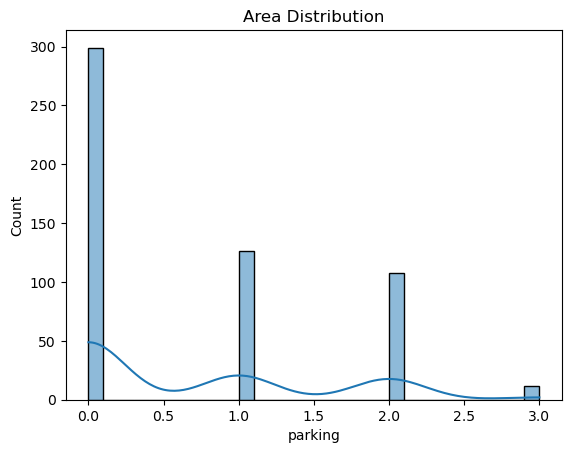

In [35]:
for col in numerical:
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title('Area Distribution')
    plt.show()

# Encoding of Categorical features

In [37]:
df[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']]=df[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']].applymap(lambda x: 1 if x == 'yes' else 0)


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


In [39]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [40]:
furnish_map = {
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
}
df['furnishingstatus'] = df['furnishingstatus'].map(furnish_map)

In [41]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [42]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


# Bivariate Analysis


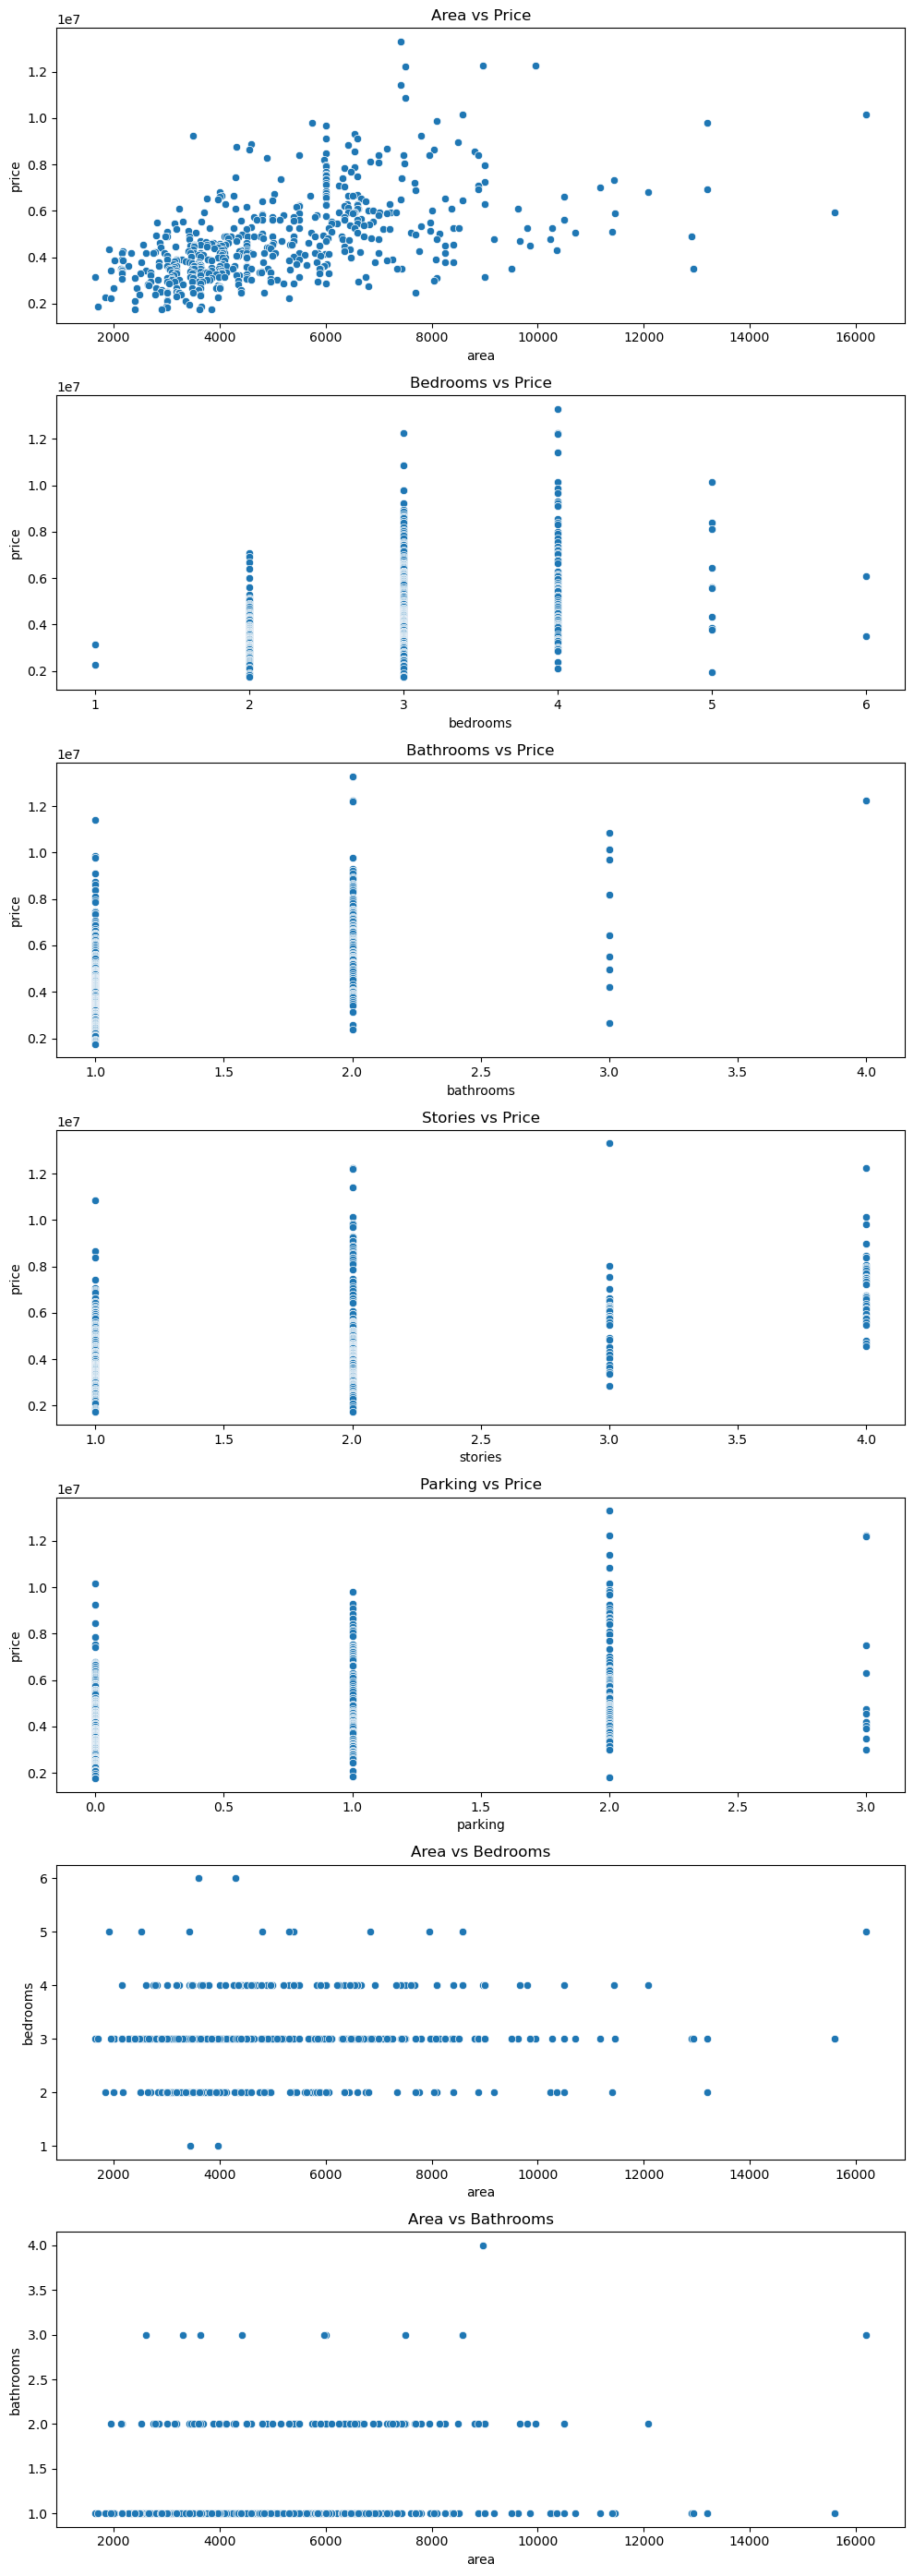

In [45]:
numerical_pairs = [
    ('area', 'price'),
    ('bedrooms', 'price'),
    ('bathrooms', 'price'),
    ('stories', 'price'),
    ('parking', 'price'),
    ('area', 'bedrooms'),
    ('area', 'bathrooms')
]

n = len(numerical_pairs)

fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(10, 4 * n))

for i, (x, y) in enumerate(numerical_pairs):
    sns.scatterplot(data=df, x=x, y=y, ax=axes[i])
    axes[i].set_title(f"{x.capitalize()} vs {y.capitalize()}")

plt.tight_layout()
plt.show()

# Check for Outliers

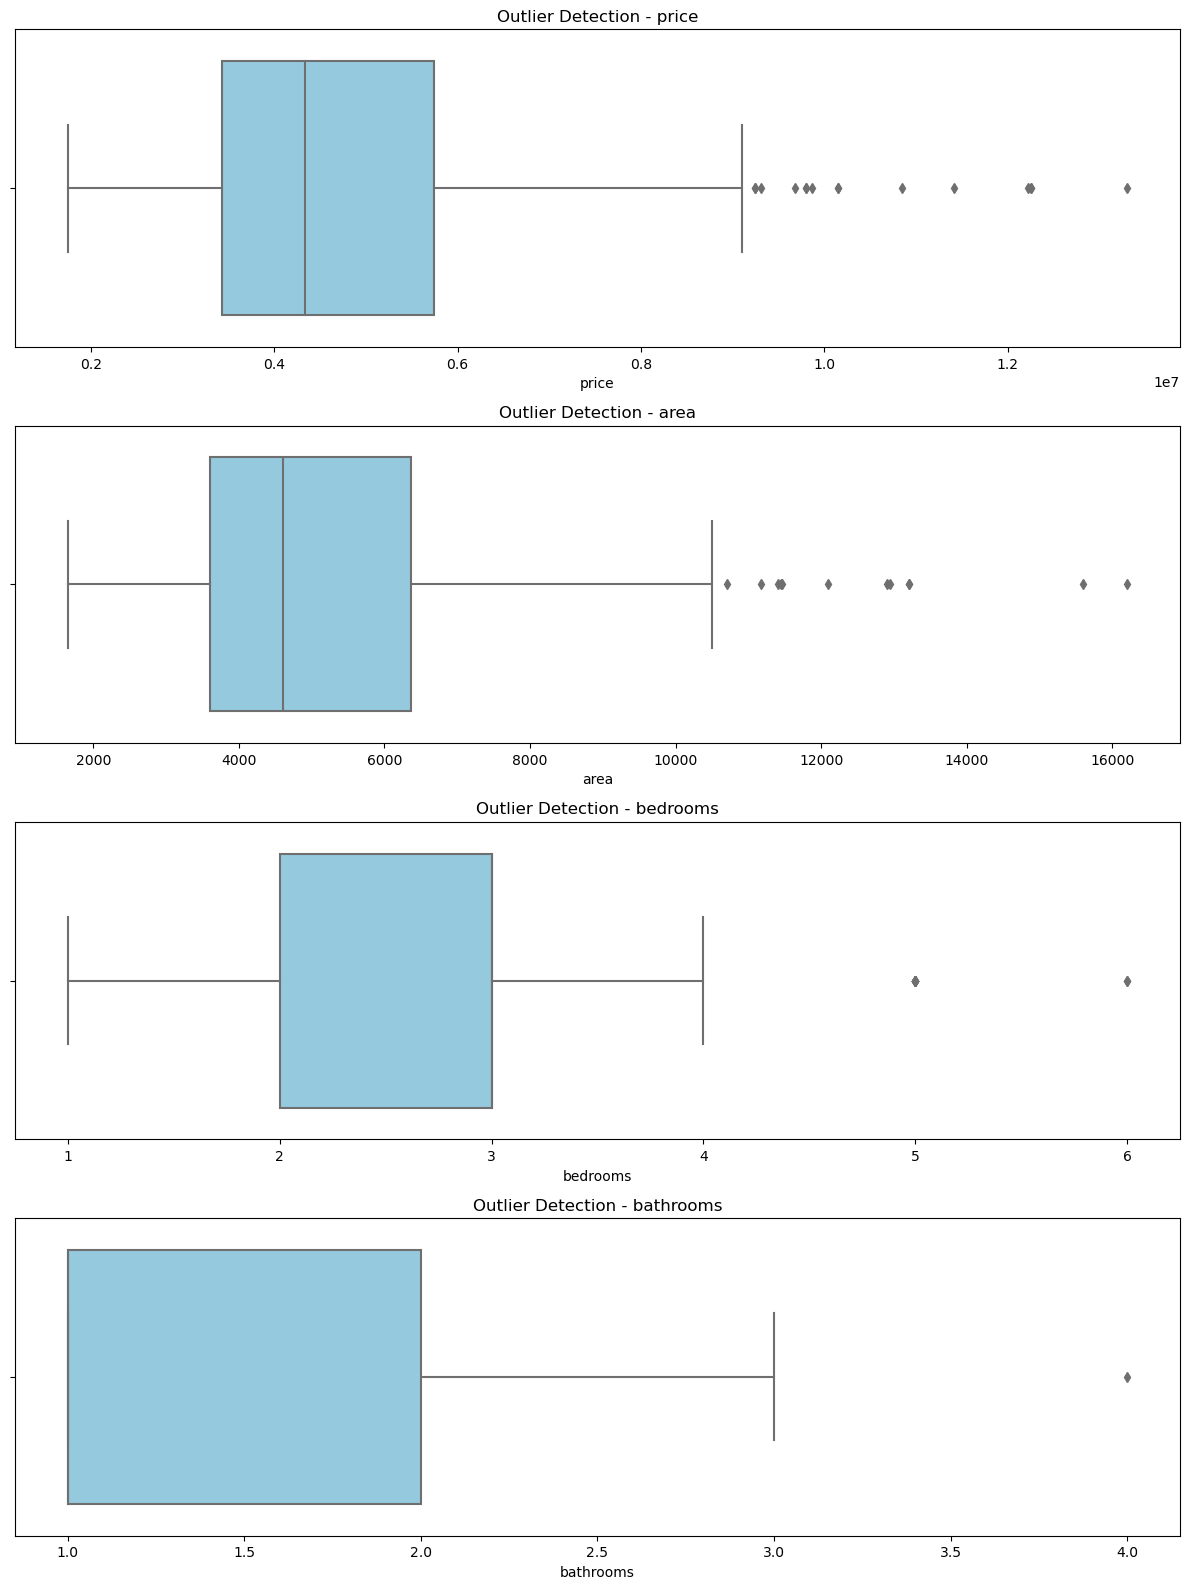

In [46]:
columns_to_check_outliers = ['price', 'area', 'bedrooms', 'bathrooms']

plt.figure(figsize=(12, 4 * len(columns_to_check_outliers)))

for i, col in enumerate(columns_to_check_outliers, 1):
    plt.subplot(len(columns_to_check_outliers), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Outlier Detection - {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Gradient Boosting Regressor

In [58]:
gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)

gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=42)

In [59]:
y_pred_log = gbr.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_train) 

In [60]:
mse = mean_squared_error(np.expm1(y_test), y_pred)
r2 = r2_score(np.expm1(y_test), y_pred)

print("MSE:", mse)
print("R² Score:", r2)

MSE: 1851383790283.8005
R² Score: 0.6337208308427104


# Hyperparameter Tuning with GridSearchCV

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1]
}

gbr = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best Score (Negative MSE): -0.04306660683945079


In [75]:
best_model = grid_search.best_estimator_
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)

mse = mean_squared_error(np.expm1(y_test), y_pred)
r2 = r2_score(np.expm1(y_test), y_pred)

print("Tuned MSE:", mse)
print("Tuned R²:", r2)


Tuned MSE: 1821785334927.2908
Tuned R²: 0.6395766116339312


# XGBoost Model

In [63]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:

xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)

# Predict and inverse log
y_pred_log = xgb.predict(X_test)
y_pred = np.expm1(y_pred_log)


In [65]:
mse = mean_squared_error(np.expm1(y_test), y_pred)
r2 = r2_score(np.expm1(y_test), y_pred)

print("XGBoost MSE:", mse)
print("XGBoost R²:", r2)


XGBoost MSE: 1823881523323.173
XGBoost R²: 0.6391619001364717


# Predicting price for new house


In [68]:
print(X.columns.tolist())


['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


In [71]:
print(df['furnishingstatus'].value_counts())
print(df['furnishingstatus'].unique())


furnishingstatus
1    227
0    178
2    140
Name: count, dtype: int64
[2 1 0]


In [78]:
new_data = {
    'area': 800,
    'bedrooms': 2,
    'bathrooms': 1,
    'stories': 1,
    'mainroad': 1,
    'guestroom': 0,
    'basement': 1,
    'hotwaterheating': 0,
    'airconditioning': 1,
    'parking': 2,
    'prefarea': 1,
    'furnishingstatus': 1
}

new_house = pd.DataFrame([new_data], columns=X.columns)


In [79]:
log_price_pred = model.predict(new_house)
price_pred = np.expm1(log_price_pred)
print(f"Predicted house price: {price_pred[0]:,.2f}")


Predicted house price: 3,337,210.41
